# Uporządkowany notebook zawierający preprocessing, funkcje oceniające modele oraz (na końcu) przekształcenia zbioru testowego

## Dostosowanie zbioru treningowego do testowego

In [45]:
#kolumny ze zbioru testowego
preds = strsplit(
  "LastCall__c	calculation_id	calculation_token	etx_make_name	etx_model_name	etx_fuel_code	production_year	etx_model_code	vehicle_id	protection_scope	kind	usage_type	use_frequency	child_carriage_frequency	mileage	yearly_mileage	used_abroad	night_parking_place	night_parking_place_postal_code	day_parking_place	day_parking_place_postal_code	theft_protection_installation	theft_protection_device_1	theft_protection_device_2	origin	buy_year	registration_date	is_damaged	leasing	car_worth	main_driver_postal_code	main_driver_age	main_driver_gender	insurance_start_date	phone_exists	calc_complete	calc_incomplete	calc_finished	phone_yes	phone_no	calculation_type	terms_acceptance	phone_acceptance	phone_accepted	step	created_at	created_at_date	affiliation_id	user_id	salesforce_lead	sent_to_sf	sf_r_purchasing	calculation_state	oc_offers_qty	oc_offer_min_val	ac_offers_qty	ac_offer_min_val	b2c_leads_sent	form_finished_at	offer_first_at	offer_last_at	offer_first_after	offer_last_after	phone_lookup_status	utm_campaign	utm_content	utm_medium	utm_source	pkb_transform_ver	went_to_partners	contact_requests	Acc_Agreement_call__c	Acc_Agreement_marketing__c	Acc_Agreement_newsletter__c	Acc_Birthdate__c	Acc_PhoneHLRStatus__c	Account__r.AccountSource	Account__r.AgreementCall__pc	Account__r.AgreementMarketing__pc	Account__r.AgreementNewsletter__pc	Account__r.BillingCity	Account__r.BillingPostalCode	Account__r.CreatedById	Account__r.CreatedDate	Account__r.Gender__pc	Account__r.Id	Account__r.IsDeleted	Account__r.IsPersonAccount	Account__r.LegacyID__c	Account__r.OwnerId	Account__r.PersonBirthdate	Account__r.PersonContactId	Account__r.PhoneHLRStatus__pc	Account__r.PhoneNATStatus__pc	Account__r.RecordTypeId	Account__r.Salutation	Account__r.Type	CalculationToken__c	CarEngineCapacity__c	CarFuelType__c	CarMake__c	CarModel__c	CarYear__c	CpcPaid__c	CreatedBy.Alias	CreatedBy.CreatedDate	CreatedById	CreatedDate	Id	IsDeleted	Mpc__c	PolicyStartDate__c	ProductScope__c	Source__c	WentToPartner__c	dont_have_this_car__c	TelehubStatus__c",
         "\t")[[1]]

In [46]:
preds

[1] "LastCall__c"                        "calculation_id"                    
  [3] "calculation_token"                  "etx_make_name"                     
  [5] "etx_model_name"                     "etx_fuel_code"                     
  [7] "production_year"                    "etx_model_code"                    
  [9] "vehicle_id"                         "protection_scope"                  
 [11] "kind"                               "usage_type"                        
 [13] "use_frequency"                      "child_carriage_frequency"          
 [15] "mileage"                            "yearly_mileage"                    
 [17] "used_abroad"                        "night_parking_place"               
 [19] "night_parking_place_postal_code"    "day_parking_place"                 
 [21] "day_parking_place_postal_code"      "theft_protection_installation"     
 [23] "theft_protection_device_1"          "theft_protection_device_2"         
 [25] "origin"                             "buy_year"                          
 [27] "registration_date"                  "is_damaged"                        
 [29] "leasing"                            "car_worth"                         
 [31] "main_driver_postal_code"            "main_driver_age"                   
 [33] "main_driver_gender"                 "insurance_start_date"              
 [35] "phone_exists"                       "calc_complete"                     
 [37] "calc_incomplete"                    "calc_finished"                     
 [39] "phone_yes"                          "phone_no"                          
 [41] "calculation_type"                   "terms_acceptance"                  
 [43] "phone_acceptance"                   "phone_accepted"                    
 [45] "step"                               "created_at"                        
 [47] "created_at_date"                    "affiliation_id"                    
 [49] "user_id"                            "salesforce_lead"                   
 [51] "sent_to_sf"                         "sf_r_purchasing"                   
 [53] "calculation_state"                  "oc_offers_qty"                     
 [55] "oc_offer_min_val"                   "ac_offers_qty"                     
 [57] "ac_offer_min_val"                   "b2c_leads_sent"                    
 [59] "form_finished_at"                   "offer_first_at"                    
 [61] "offer_last_at"                      "offer_first_after"                 
 [63] "offer_last_after"                   "phone_lookup_status"               
 [65] "utm_campaign"                       "utm_content"                       
 [67] "utm_medium"                         "utm_source"                        
 [69] "pkb_transform_ver"                  "went_to_partners"                  
 [71] "contact_requests"                   "Acc_Agreement_call__c"             
 [73] "Acc_Agreement_marketing__c"         "Acc_Agreement_newsletter__c"       
 [75] "Acc_Birthdate__c"                   "Acc_PhoneHLRStatus__c"             
 [77] "Account__r.AccountSource"           "Account__r.AgreementCall__pc"      
 [79] "Account__r.AgreementMarketing__pc"  "Account__r.AgreementNewsletter__pc"
 [81] "Account__r.BillingCity"             "Account__r.BillingPostalCode"      
 [83] "Account__r.CreatedById"             "Account__r.CreatedDate"            
 [85] "Account__r.Gender__pc"              "Account__r.Id"                     
 [87] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
 [89] "Account__r.LegacyID__c"             "Account__r.OwnerId"                
 [91] "Account__r.PersonBirthdate"         "Account__r.PersonContactId"        
 [93] "Account__r.PhoneHLRStatus__pc"      "Account__r.PhoneNATStatus__pc"     
 [95] "Account__r.RecordTypeId"            "Account__r.Salutation"             
 [97] "Account__r.Type"                    "CalculationToken__c"               
 [99] "CarEngineCapacity__c"               "CarFuelType__c"                    
[1

In [47]:
length(preds)

[1] 117

In [48]:
load('ABH.rda')
df = ABH

In [49]:
colnames(ABH)

[1] "calculation_id"                          
  [2] "calculation_token"                       
  [3] "etx_make_name"                           
  [4] "etx_model_name"                          
  [5] "etx_fuel_code"                           
  [6] "production_year"                         
  [7] "etx_model_code"                          
  [8] "vehicle_id"                              
  [9] "protection_scope"                        
 [10] "kind"                                    
 [11] "usage_type"                              
 [12] "use_frequency"                           
 [13] "child_carriage_frequency"                
 [14] "mileage"                                 
 [15] "yearly_mileage"                          
 [16] "used_abroad"                             
 [17] "night_parking_place"                     
 [18] "night_parking_place_postal_code"         
 [19] "day_parking_place"                       
 [20] "day_parking_place_postal_code"           
 [21] "theft_protection_installation"           
 [22] "theft_protection_device_1"               
 [23] "theft_protection_device_2"               
 [24] "origin"                                  
 [25] "buy_year"                                
 [26] "registration_date"                       
 [27] "is_damaged"                              
 [28] "leasing"                                 
 [29] "car_worth"                               
 [30] "main_driver_postal_code"                 
 [31] "main_driver_age"                         
 [32] "main_driver_gender"                      
 [33] "insurance_start_date"                    
 [34] "phone_exists"                            
 [35] "calc_complete"                           
 [36] "calc_incomplete"                         
 [37] "calc_finished"                           
 [38] "phone_yes"                               
 [39] "phone_no"                                
 [40] "calculation_type"                        
 [41] "terms_acceptance"                        
 [42] "phone_acceptance"                        
 [43] "phone_accepted"                          
 [44] "step"                                    
 [45] "created_at"                              
 [46] "created_at_date"                         
 [47] "affiliation_id"                          
 [48] "user_id"                                 
 [49] "sent_to_sf"                              
 [50] "sf_r_purchasing"                         
 [51] "calculation_state"                       
 [52] "oc_offers_qty"                           
 [53] "oc_offer_min_val"                        
 [54] "ac_offers_qty"                           
 [55] "ac_offer_min_val"                        
 [56] "b2c_leads_sent"                          
 [57] "form_finished_at"                        
 [58] "offer_first_at"                          
 [59] "offer_last_at"                           
 [60] "offer_first_after"                       
 [61] "offer_last_after"                        
 [62] "phone_lookup_status"                     
 [63] "utm_campaign"                            
 [64] "utm_content"                             
 [65] "utm_medium"                              
 [66] "utm_source"                              
 [67] "pkb_transform_ver"                       
 [68] "went_to_partners"                        
 [69] "contact_requests"                        
 [70] "policy_started"                          
 [71] "policy_issued"                           
 [72] "collection"                              
 [73] "commision"                               
 [74] "imp_fullcalc_status"                     
 [75] "Acc_Agreement_call__c"                   
 [76] "Acc_Agreement_marketing__c"              
 [77] "Acc_Agreement_newsletter__c"             
 [78] "Acc_Birthdate__c"                        
 [79] "Acc_PhoneHLRStatus__c"                   
 [80] "Account_Last_Modified_At__c"             
 [81] "Account__r.AccountSource"                
 [82] "Account__r.AgreementCall__

In [50]:
ncol(df)

[1] 152

In [51]:
#wybieram tylko kolumny, ktore sa w zbiorze testowym

In [52]:
indices = sapply(preds, function(pred){which(colnames(df)==pred)})

In [53]:
length(indices)

[1] 117

In [54]:
labelindex = which(colnames(df)=='Sale.success')

In [55]:
#to jest etykieta wlasciwa - czy sprzedaz sie udala?
labelindex

[1] 148

In [56]:
unlist(indices)

LastCall__c                     calculation_id 
                               120                                  1 
                 calculation_token                      etx_make_name 
                                 2                                  3 
                    etx_model_name                      etx_fuel_code 
                                 4                                  5 
                   production_year                     etx_model_code 
                                 6                                  7 
                        vehicle_id                   protection_scope 
                                 8                                  9 
                              kind                         usage_type 
                                10                                 11 
                     use_frequency           child_carriage_frequency 
                                12                                 13 
                           mileage                     yearly_mileage 
                                14                                 15 
                       used_abroad                night_parking_place 
                                16                                 17 
   night_parking_place_postal_code                  day_parking_place 
                                18                                 19 
     day_parking_place_postal_code      theft_protection_installation 
                                20                                 21 
         theft_protection_device_1          theft_protection_device_2 
                                22                                 23 
                            origin                           buy_year 
                                24                                 25 
                 registration_date                         is_damaged 
                                26                                 27 
                           leasing                          car_worth 
                                28                                 29 
           main_driver_postal_code                    main_driver_age 
                                30                                 31 
                main_driver_gender               insurance_start_date 
                                32                                 33 
                      phone_exists                      calc_complete 
                                34                                 35 
                   calc_incomplete                      calc_finished 
                                36                                 37 
                         phone_yes                           phone_no 
                                38                                 39 
                  calculation_type                   terms_acceptance 
                                40                                 41 
                  phone_acceptance                     phone_accepted 
                                42                                 43 
                              step                         created_at 
                                44                                 45 
                   created_at_date                     affiliation_id 
                                46                                 47 
                           user_id                         sent_to_sf 
                                48                                 49 
                   sf_r_purchasing                  calculation_state 
                                50                                 51 
                     oc_offers_qty                   oc_offer_min_val 
                                52                                 53 
                     ac_offers_qty                   ac_offer_min_val 
                                54                                 55 
                    b2c_leads_sent             

In [57]:
#wlasciwa ramka danych - to co w testowym + etykieta
train = df[,c(unlist(indices),labelindex)]

In [58]:
ncol(train)

[1] 117

In [59]:
head(train)

,LastCall__c,calculation_id,calculation_token,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,vehicle_id,protection_scope,⋯,Id,IsDeleted,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,NA,1847410,Fc5o2b,RENAULT,Megane,100001,1997,8191,7045,1,⋯,a00410000086mtqAAA,FALSE,NA,42811,OC,full_calc,FALSE,FALSE,NA,0
3,NA,1847453,dRXV5F,MAZDA,323,100001,1996,7884,34707,1,⋯,a00410000086mniAAA,FALSE,NA,42794,OC,full_calc,FALSE,FALSE,NA,0
4,NA,1847456,eRdBt1,AUDI,Q7,100003,2007,12113,60275,2,⋯,a00410000086lSqAAI,FALSE,NA,42795,OC+AC,full_calc,FALSE,FALSE,NA,0
5,NA,1847478,ZWLyxM,VOLKSWAGEN,Passat,100003,2001,10533,41583,1,⋯,a00410000086mwuAAA,FALSE,NA,42807,OC,full_calc,TRUE,FALSE,NA,0
6,NA,1847487,rCzLgy,PEUGEOT,406,100003,2000,9674,36042,1,⋯,a00410000086mzKAAQ,FALSE,NA,42803,OC,full_calc,FALSE,FALSE,NA,0
7,NA,1847494,A1_zH9,SKODA,Fabia,100001,2001,10269,44128,1,⋯,a00410000086mvDAAQ,FALSE,NA,42822,OC,full_calc,FALSE,FALSE,NA,1


## usuwanie identyfikatorów

In [60]:
colnames(train)[grepl(".*id.*", colnames(train), ignore.case = T)]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [61]:
ids = which(grepl(".*id.*",colnames(train),ignore.case=T))

In [62]:
#identyfikatory, do usuniecia
ids

[1]   2   9  48  49  82  85  88  89  91  94 103 106 108

In [63]:
colnames(train)[ids]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [64]:
#ta kolumna moze sie przydac
cpcpaid = which(colnames(train)=='CpcPaid__c')

In [65]:
cpcpaid

[1] 103

In [66]:
#token kalkulacji nie jest potrzebny
calctokenid = which(colnames(train)=='calculation_token')

In [67]:
ids = c(ids[ids!=cpcpaid],calctokenid)

In [68]:
ids

[1]   2   9  48  49  82  85  88  89  91  94 106 108   3

In [69]:
#te predyktory powyzej do usuniecia, zatem usuwam
train2 = train[,-ids]

In [70]:
ncol(train2)

[1] 104

## Zamiana character -> numeric

In [71]:
sapply(train2,class)

LastCall__c                      etx_make_name 
                         "numeric"                        "character" 
                    etx_model_name                      etx_fuel_code 
                       "character"                        "character" 
                   production_year                     etx_model_code 
                       "character"                        "character" 
                  protection_scope                               kind 
                       "character"                        "character" 
                        usage_type                      use_frequency 
                       "character"                        "character" 
          child_carriage_frequency                            mileage 
                       "character"                        "character" 
                    yearly_mileage                        used_abroad 
                       "character"                          "numeric" 
               night_parking_place    night_parking_place_postal_code 
                       "character"                        "character" 
                 day_parking_place      day_parking_place_postal_code 
                       "character"                        "character" 
     theft_protection_installation          theft_protection_device_1 
                       "character"                        "character" 
         theft_protection_device_2                             origin 
                       "character"                        "character" 
                          buy_year                  registration_date 
                       "character"                          "numeric" 
                        is_damaged                            leasing 
                       "character"                        "character" 
                         car_worth            main_driver_postal_code 
                       "character"                        "character" 
                   main_driver_age                 main_driver_gender 
                         "numeric"                        "character" 
              insurance_start_date                       phone_exists 
                         "numeric"                        "character" 
                     calc_complete                    calc_incomplete 
                         "numeric"                          "numeric" 
                     calc_finished                          phone_yes 
                         "numeric"                          "numeric" 
                          phone_no                   calculation_type 
                         "numeric"                        "character" 
                  terms_acceptance                   phone_acceptance 
                         "numeric"                          "numeric" 
                    phone_accepted                               step 
                         "numeric"                          "numeric" 
                        created_at                    created_at_date 
                         "numeric"                          "numeric" 
                        sent_to_sf                    sf_r_purchasing 
                         "numeric"                          "numeric" 
                 calculation_state                      oc_offers_qty 
                       "character"                          "numeric" 
                  oc_offer_min_val                      ac_offers_qty 
                         "numeric"                          "numeric" 
                  ac_offer_min_val                     b2c_leads_sent 
                         "numeric"                          "numeric" 
                  form_finished_at                     offer_first_at 
                         "numeric"                          "numeric" 
                     offer_last_at                  offer_first_after 
                         "numeric"                          "numeric" 
                  offer_last_after             

In [72]:
#te kolumny są numeryczne, a wczytane zostały jako character, zatem zamiana

In [73]:
train2$production_year = as.numeric(train2$production_year)
train2$mileage = as.numeric(train2$mileage)
train2$yearly_mileage = as.numeric(train2$yearly_mileage)
train2$buy_year = as.numeric(train2$buy_year)
train2$car_worth = as.numeric(train2$car_worth)


In [74]:
sapply(train2,class)

LastCall__c                      etx_make_name 
                         "numeric"                        "character" 
                    etx_model_name                      etx_fuel_code 
                       "character"                        "character" 
                   production_year                     etx_model_code 
                         "numeric"                        "character" 
                  protection_scope                               kind 
                       "character"                        "character" 
                        usage_type                      use_frequency 
                       "character"                        "character" 
          child_carriage_frequency                            mileage 
                       "character"                          "numeric" 
                    yearly_mileage                        used_abroad 
                         "numeric"                          "numeric" 
               night_parking_place    night_parking_place_postal_code 
                       "character"                        "character" 
                 day_parking_place      day_parking_place_postal_code 
                       "character"                        "character" 
     theft_protection_installation          theft_protection_device_1 
                       "character"                        "character" 
         theft_protection_device_2                             origin 
                       "character"                        "character" 
                          buy_year                  registration_date 
                         "numeric"                          "numeric" 
                        is_damaged                            leasing 
                       "character"                        "character" 
                         car_worth            main_driver_postal_code 
                         "numeric"                        "character" 
                   main_driver_age                 main_driver_gender 
                         "numeric"                        "character" 
              insurance_start_date                       phone_exists 
                         "numeric"                        "character" 
                     calc_complete                    calc_incomplete 
                         "numeric"                          "numeric" 
                     calc_finished                          phone_yes 
                         "numeric"                          "numeric" 
                          phone_no                   calculation_type 
                         "numeric"                        "character" 
                  terms_acceptance                   phone_acceptance 
                         "numeric"                          "numeric" 
                    phone_accepted                               step 
                         "numeric"                          "numeric" 
                        created_at                    created_at_date 
                         "numeric"                          "numeric" 
                        sent_to_sf                    sf_r_purchasing 
                         "numeric"                          "numeric" 
                 calculation_state                      oc_offers_qty 
                       "character"                          "numeric" 
                  oc_offer_min_val                      ac_offers_qty 
                         "numeric"                          "numeric" 
                  ac_offer_min_val                     b2c_leads_sent 
                         "numeric"                          "numeric" 
                  form_finished_at                     offer_first_at 
                         "numeric"                          "numeric" 
                     offer_last_at                  offer_first_after 
                         "numeric"                          "numeric" 
                  offer_last_after             

## Zamiana character -> factor, dodawanie poziomu NA

In [75]:
for (i in 1:length(train2)) {
  if (is.character(train2[,i])){
    train2[,i] = as.factor(train2[,i])
  }
  if (is.factor(train2[,i])){
      train2[,i] = addNA(train2[,i])
  }
}

## Usuwanie predyktorów z wariancją bliską zero (czyli takich co mają przeważnie jedną wartość lub jedna wartość jest drastycznie częsta)

In [76]:
if (!require("caret")){
    install.packages("caret")
}
library("caret")

In [77]:
nzv = nearZeroVar(train2,freqCut=99) #bardzo duży cutoff - 99/1 (by nie obcinać zbyt dużo)

In [78]:
colnames(train2)[nzv]

[1] "usage_type"                         "is_damaged"                        
 [3] "leasing"                            "calc_complete"                     
 [5] "calc_incomplete"                    "calc_finished"                     
 [7] "calculation_type"                   "terms_acceptance"                  
 [9] "sent_to_sf"                         "sf_r_purchasing"                   
[11] "calculation_state"                  "ac_offer_min_val"                  
[13] "pkb_transform_ver"                  "contact_requests"                  
[15] "Acc_Agreement_newsletter__c"        "Account__r.AgreementNewsletter__pc"
[17] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
[19] "Account__r.Type"                    "CpcPaid__c"                        
[21] "CreatedBy.Alias"                    "CreatedBy.CreatedDate"             
[23] "IsDeleted"

In [79]:
train3 = train2[,-nzv]
#od razu mniej predyktorów:
ncol(train3)

[1] 81

## Imputacja numerycznych faktorów

In [80]:
numericpreds = which(sapply(train3,class)=='numeric')
yind = which(names(numericpreds)=='Sale.success')
numericpreds = numericpreds[-yind]
numericpreds

LastCall__c            production_year 
                         1                          5 
                   mileage             yearly_mileage 
                        11                         12 
               used_abroad                   buy_year 
                        13                         22 
         registration_date                  car_worth 
                        23                         24 
           main_driver_age       insurance_start_date 
                        26                         28 
                 phone_yes                   phone_no 
                        30                         31 
          phone_acceptance             phone_accepted 
                        32                         33 
                      step                 created_at 
                        34                         35 
           created_at_date              oc_offers_qty 
                        36                         37 
          oc_offer_min_val              ac_offers_qty 
                        38                         39 
            b2c_leads_sent           form_finished_at 
                        40                         41 
            offer_first_at              offer_last_at 
                        42                         43 
         offer_first_after           offer_last_after 
                        44                         45 
       phone_lookup_status           went_to_partners 
                        46                         51 
          Acc_Birthdate__c     Account__r.CreatedDate 
                        54                         61 
Account__r.PersonBirthdate       CarEngineCapacity__c 
                        63                         68 
                CarYear__c                CreatedDate 
                        72                         73 
        PolicyStartDate__c 
                        75

### Numeryczne atrybuty bez NA, poszukam takich:

In [81]:
has_NA = sapply(numericpreds,function(npred)any(is.na(train3[,npred])))

In [82]:
numericpreds = numericpreds[has_NA]
numericpreds
numericpreds_keep_to_test = numericpreds

LastCall__c                    mileage 
                         1                         11 
            yearly_mileage                   buy_year 
                        12                         22 
                 car_worth              oc_offers_qty 
                        24                         37 
             ac_offers_qty             b2c_leads_sent 
                        39                         40 
          form_finished_at             offer_first_at 
                        41                         42 
             offer_last_at           Acc_Birthdate__c 
                        43                         54 
Account__r.PersonBirthdate       CarEngineCapacity__c 
                        63                         68 
                CarYear__c         PolicyStartDate__c 
                        72                         75

Jest ich na tyle mało, że imputacja może być ręczna

In [83]:
#sprawdzam frakcję brakujących danych
sapply(train3[,numericpreds],function(x){mean(is.na(x))})

LastCall__c                    mileage 
              7.628943e-01               5.339256e-05 
            yearly_mileage                   buy_year 
              4.271405e-05               5.339256e-05 
                 car_worth              oc_offers_qty 
              3.583709e-02               1.847383e-03 
             ac_offers_qty             b2c_leads_sent 
              1.428571e-01               7.032868e-02 
          form_finished_at             offer_first_at 
              2.028917e-04               2.843368e-01 
             offer_last_at           Acc_Birthdate__c 
              2.843368e-01               4.922794e-01 
Account__r.PersonBirthdate       CarEngineCapacity__c 
              4.922794e-01               3.162975e-02 
                CarYear__c         PolicyStartDate__c 
              3.151229e-02               7.047818e-03

In [84]:
#kilka predyktorów ma dużo brakujących danych - trzeba będzie potem pomyśleć co z tym można zrobić

In [85]:
length(numericpreds)

[1] 16

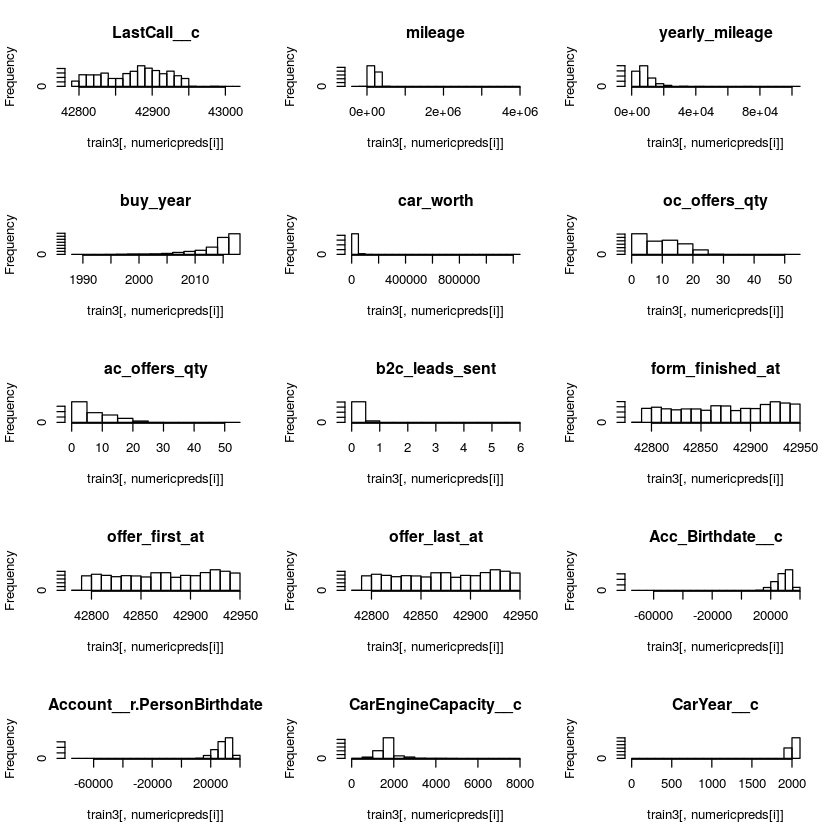

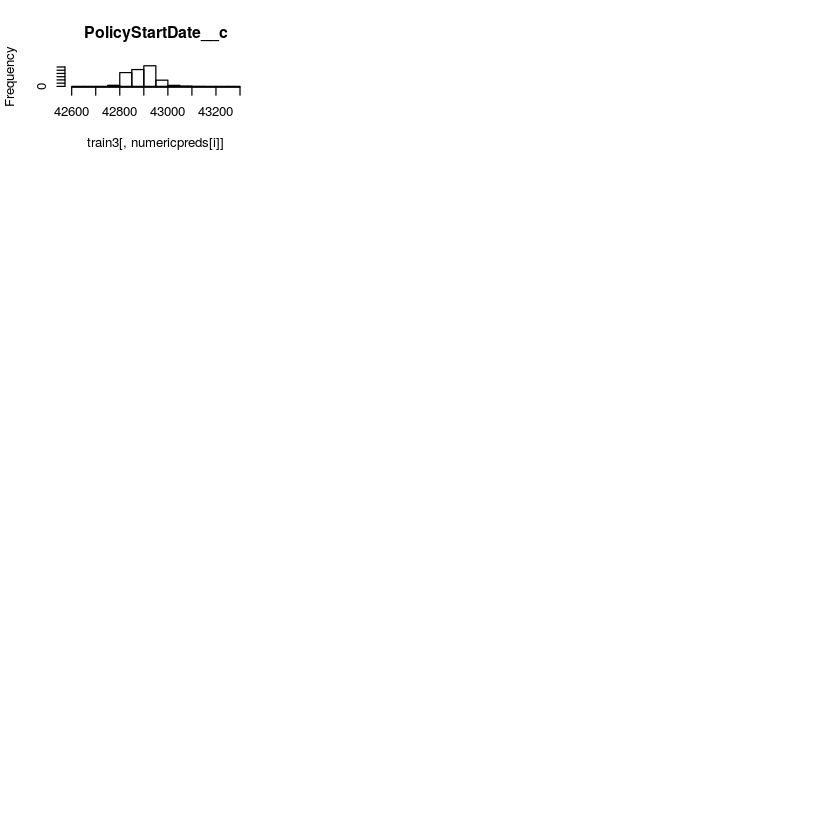

In [86]:
#rozkład wartości w predyktorach
par(mfrow=c(5,3))
for (i in 1:length(numericpreds)){
    hist(train3[,numericpreds[i]],main=colnames(train3)[numericpreds[i]])
}

Imputacja brakujących danych przez średnie (inne metody są niewykonalne w skończonym czasie)

In [87]:
for (numericpred in numericpreds){
    train3[which(is.na(train3[,numericpred])),numericpred] = as.integer(mean(na.omit(train3[,numericpred])))
}

In [88]:
#nie ma już żadnych brakujących wartości
any(sapply(train3,function(x)any(is.na(x))))

[1] FALSE

## Zamiana logical na numeric

In [89]:
(linds = which(sapply(train3,class)%in%c('logical')))

[1] 52 53 57 58 78 79

In [90]:
for (l in linds){
    train3[,l] = as.integer(train3[,l])
}

## Korelacje

In [91]:
#korelacja nie dziala dla factorow - sprawdzam zatem tylko dla ilosciowych
numerics = which(sapply(train3,class)%in%c('numeric','integer'))
cr = cor(train3[,numerics])

In [92]:
correlated = findCorrelation(cr,cutoff= 0.8,names=TRUE)

In [93]:
correlated

[1] "Account__r.CreatedDate"       "CreatedDate"                 
 [3] "created_at"                   "form_finished_at"            
 [5] "created_at_date"              "insurance_start_date"        
 [7] "offer_first_at"               "phone_yes"                   
 [9] "phone_no"                     "phone_acceptance"            
[11] "phone_accepted"               "Acc_Agreement_call__c"       
[13] "Acc_Agreement_marketing__c"   "Account__r.AgreementCall__pc"
[15] "oc_offers_qty"                "Acc_Birthdate__c"

In [94]:
traininds = sapply(correlated,function(cc)which(colnames(train3)==cc))

In [95]:
train4 = train3[,-traininds]

In [96]:
ncol(train4)

[1] 65

## Współliniowość

In [97]:
#podobnie jak wczesniej, znowu dla ilosciowych tylko
numerics = which(sapply(train4,class)%in%c('numeric','integer'))

In [98]:
numerics

[1]  1  5 11 12 13 22 23 24 26 29 30 31 32 33 34 35 36 41 44 48 53 57 59 62 63
[26] 65

In [99]:
combos = findLinearCombos(train4[,numerics])

In [100]:
combos

$linearCombos
list()

$remove
NULL


Korelacja usunęła współliniowości.

## Zamiana kodów pocztowych na rejon

### Funkcja

In [101]:
postalCodeToRegion = function (vector){
    vector = as.character(vector)
    codes = sapply(vector,function(v){
        if (is.na(v) | (substr(v,3,3) != '-') | (nchar(v) != 6)){
            NA
        } else {
            aa = substr(v,1,2)
            a = substr(aa,1,1)
            if (a == '0'){
                if (aa %in% c('00','01','02','03','04','05')){
                    'Warsaw'
                } else {
                    'Warsaw Region'
                }
            }else if (a == '1'){
                if (aa == '10'){
                    'Olsztyn'
                } else if (aa=='15'){
                    'Bialystok'
                } else {
                    'Olsztyn Region'
                }
            }else if (a == '2'){
                if (aa == '20'){
                    'Lublin'
                } else if (aa=='25'){
                    'Kielce'
                } else if (aa=='26'){
                    'Radom'
                } else {
                    'Lublin Region'
                }
            }else if (a == '3'){
                if (aa %in% c('30','31')){
                    'Krakow'
                } else if (aa=='35'){
                    'Rzeszow'
                } else {
                    'Krakow Region'
                }
            }else if (a == '4'){
                if (aa =='40'){
                    'Katowice'
                } else if (aa=='45'){
                    'Opole'
                } else {
                    'Katowice Region'
                }
            }else if (a == '5'){
                if (aa %in% c('50','51','52','53','54')){
                    'Wroclaw'
                } else {
                    'Wroclaw Region'
                }
            }else if (a == '6'){
                if (aa %in% c('60','61')){
                    'Poznan'
                } else if (aa=='65'){
                    'Zielona Gora'
                } else {
                    'Poznan Region'
                }
            }else if (a == '7'){
                if (aa %in% c('70','71')){
                    'Szczecin'
                } else if (aa=='75'){
                    'Koszalin'
                } else {
                    'Szczecin Region'
                }
            }else if (a == '8'){
                if (aa=='80'){
                    'Gdansk'
                } else if (aa=='81'){
                    'Gdynia'
                } else if (aa=='87'){
                    'Torun'
                }  else if (aa=='85'){
                    'Bydgoszcz'
                } else {
                    'Gdansk Region'
                }
            }else if (a == '9'){
                if (aa %in% c('90','91','92','93','94')){
                    'Lodz'
                } else {
                    'Lodz Region'
                }
            }else {NA}
        }
    })
    fcodes = as.factor(codes)
    fcodes = addNA(fcodes)
    fcodes
}

In [102]:
#unit test
(fac = postalCodeToRegion(c('87-165','00-849','44-123',NA)))
class(fac)
levels(fac)

87-165          00-849          44-123            <NA> 
          Torun          Warsaw Katowice Region            <NA> 
Levels: Katowice Region Torun Warsaw <NA>

[1] "factor"

[1] "Katowice Region" "Torun"           "Warsaw"          NA

In [103]:
#kodami pocztowymi są:
#night_parking_place_postal_code
#day_parking_place_postal_code
#main_driver_postal_code
#Account__r.BillingPostalCode

train4$night_parking_place_postal_code = postalCodeToRegion (train4$night_parking_place_postal_code)
train4$day_parking_place_postal_code = postalCodeToRegion (train4$day_parking_place_postal_code)
train4$main_driver_postal_code = postalCodeToRegion (train4$main_driver_postal_code)
train4$Account__r.BillingPostalCode = postalCodeToRegion (train4$Account__r.BillingPostalCode)

In [104]:
class(train4$night_parking_place_postal_code)
class(train4$day_parking_place_postal_code)
class(train4$main_driver_postal_code)
class(train4$Account__r.BillingPostalCode)

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

In [105]:
head(train4$night_parking_place_postal_code)
head(train4$day_parking_place_postal_code)
head(train4$main_driver_postal_code)
head(train4$Account__r.BillingPostalCode)

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] <NA>            <NA>            <NA>            Katowice Region
[5] <NA>            <NA>           
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

## Daty na year,month,day

Nie trzeba zamieniać dat na year, month, day. Daty albo zostały usunięte wcześniej, albo zamienione na numeric (domyślnie najwidoczniej przez read.table).

In [106]:
colnames(train4)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "etx_model_code"                   
 [7] "protection_scope"                  "kind"                             
 [9] "use_frequency"                     "child_carriage_frequency"         
[11] "mileage"                           "yearly_mileage"                   
[13] "used_abroad"                       "night_parking_place"              
[15] "night_parking_place_postal_code"   "day_parking_place"                
[17] "day_parking_place_postal_code"     "theft_protection_installation"    
[19] "theft_protection_device_1"         "theft_protection_device_2"        
[21] "origin"                            "buy_year"                         
[23] "registration_date"                 "car_worth"                        
[25] "main_driver_postal_code"           "main_driver_age"                  
[27] "main_driver_gender"                "phone_exists"                     
[29] "step"                              "oc_offer_min_val"                 
[31] "ac_offers_qty"                     "b2c_leads_sent"                   
[33] "offer_last_at"                     "offer_first_after"                
[35] "offer_last_after"                  "phone_lookup_status"              
[37] "utm_campaign"                      "utm_content"                      
[39] "utm_medium"                        "utm_source"                       
[41] "went_to_partners"                  "Acc_PhoneHLRStatus__c"            
[43] "Account__r.AccountSource"          "Account__r.AgreementMarketing__pc"
[45] "Account__r.BillingCity"            "Account__r.BillingPostalCode"     
[47] "Account__r.Gender__pc"             "Account__r.PersonBirthdate"       
[49] "Account__r.PhoneHLRStatus__pc"     "Account__r.PhoneNATStatus__pc"    
[51] "Account__r.Salutation"             "CalculationToken__c"              
[53] "CarEngineCapacity__c"              "CarFuelType__c"                   
[55] "CarMake__c"                        "CarModel__c"                      
[57] "CarYear__c"                        "Mpc__c"                           
[59] "PolicyStartDate__c"                "ProductScope__c"                  
[61] "Source__c"                         "WentToPartner__c"                 
[63] "dont_have_this_car__c"             "TelehubStatus__c"                 
[65] "Sale.success"

## Propozycja radzenia sobie z markami pojazdów i innymi factorami

In [107]:
#wybieranie pierwszej części stringa określającego markę, zbije trochę liczbę poziomów

length(unique(sapply(as.character(levels(train4$etx_model_name)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$etx_model_name))

length(unique(sapply(as.character(levels(train4$CarModel__c)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$CarModel__c))

[1] 666

[1] 729

[1] 766

[1] 1526

In [108]:
etxmodel = sapply(as.character(train4$etx_model_name),function(model){
    strsplit(model,' ')[[1]][1]
})

cmodel = sapply(as.character(train4$CarModel__c),function(model){
    strsplit(model,' ')[[1]][1]
})

In [109]:
etxmodel = as.factor(etxmodel)
#etxmodel = addNA(etxmodel)

cmodel = as.factor(cmodel)
#cmodel = addNA(cmodel)

In [110]:
any(is.na(etxmodel))

[1] FALSE

In [111]:
any(is.na(cmodel))

[1] TRUE

In [112]:
cmodel = addNA(cmodel)

In [113]:
chisq.test(table(etxmodel,cmodel))

Warning message in chisq.test(table(etxmodel, cmodel)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(etxmodel, cmodel)
X-squared = 54187000, df = 507960, p-value < 2.2e-16


### Marki są zależne. Można wyrzucić jeden z atrybutów marki.

In [114]:
ncol(train4)
train4$CarModel__c = NULL
ncol(train4)

[1] 65

[1] 64

In [115]:
head(train4)

,LastCall__c,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,protection_scope,kind,use_frequency,child_carriage_frequency,⋯,CarMake__c,CarYear__c,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,42874,RENAULT,Megane,100001,1997,8191,1,car,regularly,3,⋯,RENAULT,2001,NA,42811,OC,full_calc,0,0,NA,0
3,42874,MAZDA,323,100001,1996,7884,1,car,occasionally,3,⋯,MAZDA,2001,NA,42794,OC,full_calc,0,0,NA,0
4,42874,AUDI,Q7,100003,2007,12113,2,car,regularly,3,⋯,AUDI,2001,NA,42795,OC+AC,full_calc,0,0,NA,0
5,42874,VOLKSWAGEN,Passat,100003,2001,10533,1,car,occasionally,3,⋯,VOLKSWAGEN,2001,NA,42807,OC,full_calc,1,0,NA,0
6,42874,PEUGEOT,406,100003,2000,9674,1,car,regularly,3,⋯,PEUGEOT,2001,NA,42803,OC,full_calc,0,0,NA,0
7,42874,SKODA,Fabia,100001,2001,10269,1,car,regularly,3,⋯,SKODA,2001,NA,42822,OC,full_calc,0,0,NA,1


In [116]:
#model code do wyrzucenia
train4$etx_model_code = NULL

## W tym momencie - przerobione dane treningowe są w zmiennej train4, etykieta to Sale.success

## Podejście stare - bez predyktora LastCall__c

In [157]:
train4nl = train4[,-which(colnames(train4)=='LastCall__c')]
mdtrain4nl = sparse.model.matrix(Sale.success~.,train4nl)

In [158]:
dim(train4nl)
dim(train4)

[1] 93646    62

[1] 93646    63

## Podejście 3 - eliminacja ewidentnie zależnych predyktorów, przekształcenia kolumn

In [192]:
colnames(train4)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "protection_scope"                 
 [7] "kind"                              "use_frequency"                    
 [9] "child_carriage_frequency"          "mileage"                          
[11] "yearly_mileage"                    "used_abroad"                      
[13] "night_parking_place"               "night_parking_place_postal_code"  
[15] "day_parking_place"                 "day_parking_place_postal_code"    
[17] "theft_protection_installation"     "theft_protection_device_1"        
[19] "theft_protection_device_2"         "origin"                           
[21] "buy_year"                          "registration_date"                
[23] "car_worth"                         "main_driver_postal_code"          
[25] "main_driver_age"                   "main_driver_gender"               
[27] "phone_exists"                      "step"                             
[29] "oc_offer_min_val"                  "ac_offers_qty"                    
[31] "b2c_leads_sent"                    "offer_last_at"                    
[33] "offer_first_after"                 "offer_last_after"                 
[35] "phone_lookup_status"               "utm_campaign"                     
[37] "utm_content"                       "utm_medium"                       
[39] "utm_source"                        "went_to_partners"                 
[41] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[43] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[45] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[47] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[49] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[51] "CalculationToken__c"               "CarEngineCapacity__c"             
[53] "CarFuelType__c"                    "CarMake__c"                       
[55] "CarYear__c"                        "Mpc__c"                           
[57] "PolicyStartDate__c"                "ProductScope__c"                  
[59] "Source__c"                         "WentToPartner__c"                 
[61] "dont_have_this_car__c"             "TelehubStatus__c"                 
[63] "Sale.success"

In [193]:
train4m = train4
train4m$contactDifference = (train4m$LastCall__c)-(train4m$offer_last_at)

In [194]:
train4m$CarMake__c = NULL

In [195]:
train4m$timeWaiting = (train4m$offer_last_after)-(train4m$offer_first_after)

In [196]:
head(train4m$timeWaiting)

[1]  0  0 18 17 31  0

In [197]:
train4m$hurryTime = (train4m$PolicyStartDate__c)-(train4m$offer_last_at)

In [198]:
mdtrain4m = sparse.model.matrix(Sale.success~.,train4m)

## Train4 z obniżonymi levelami factorów

In [220]:
sapply(train4,function(l)length(levels(l)))

LastCall__c                     etx_make_name 
                                0                                69 
                   etx_model_name                     etx_fuel_code 
                              729                                 6 
                  production_year                  protection_scope 
                                0                                 3 
                             kind                     use_frequency 
                                3                                 3 
         child_carriage_frequency                           mileage 
                                4                                 0 
                   yearly_mileage                       used_abroad 
                                0                                 0 
              night_parking_place   night_parking_place_postal_code 
                                7                                31 
                day_parking_place     day_parking_place_postal_code 
                                7                                31 
    theft_protection_installation         theft_protection_device_1 
                                5                                 5 
        theft_protection_device_2                            origin 
                                6                                 5 
                         buy_year                 registration_date 
                                0                                 0 
                        car_worth           main_driver_postal_code 
                                0                                31 
                  main_driver_age                main_driver_gender 
                                0                                 3 
                     phone_exists                              step 
                                3                                 0 
                 oc_offer_min_val                     ac_offers_qty 
                                0                                 0 
                   b2c_leads_sent                     offer_last_at 
                                0                                 0 
                offer_first_after                  offer_last_after 
                                0                                 0 
              phone_lookup_status                      utm_campaign 
                                0                               102 
                      utm_content                        utm_medium 
                              286                                48 
                       utm_source                  went_to_partners 
                               79                                 0 
            Acc_PhoneHLRStatus__c          Account__r.AccountSource 
                                5                                22 
Account__r.AgreementMarketing__pc            Account__r.BillingCity 
                                0                              7174 
     Account__r.BillingPostalCode             Account__r.Gender__pc 
                               31                                 3 
       Account__r.PersonBirthdate     Account__r.PhoneHLRStatus__pc 
                                0                                 5 
    Account__r.PhoneNATStatus__pc             Account__r.Salutation 
                                8                                 6 
              CalculationToken__c              CarEngineCapacity__c 
                            91837                                 0 
                   CarFuelType__c                        CarMake__c 
                                6                                79 
                       CarYear__c                            Mpc__c 
                                0                                23 
               PolicyStartDate__c                   ProductScope__c 
                                0                                 4 
                    

In [288]:
#upraszczanie factorów Mpc__c

In [289]:
train4l = train4
train4l$Mpc__c = as.factor(tolower(train4l$Mpc__c))
train4l$Mpc__c = addNA(train4l$Mpc__c)

In [290]:
train4l$CalculationToken__c = NULL

In [291]:
utm_campaign = sapply(train4$utm_campaign, function(u){
    u = as.character(u)
    if (is.na(u)){NA}else if 
        (regexpr('mailing',u,ignore.case=T)>0) {"mailing"} else if 
        (regexpr('baner',u,ignore.case=T)>0){"baner"} else
            {u}
})

utm_campaign = as.factor(utm_campaign)
utm_campaign = addNA(utm_campaign)
train4l$utm_campaign = utm_campaign

In [292]:
utm_content = sapply(train4$utm_content, function(u){
    u = as.character(u)
    if (is.na(u)){NA}else if 
        (regexpr('OC',u,ignore.case=T)==1) {"OC"} else {u}
})

utm_content = as.factor(utm_content)
utm_content = addNA(utm_content)
train4l$utm_content = utm_content

In [294]:
mdtrain4l = sparse.model.matrix(Sale.success~.,train4l)

In [295]:
dim(mdtrain4l)
dim(mdtrain4)

[1] 93646  8590

[1]  93646 100697

# Funkcje do oceny modeli (ROC, AUC)

In [72]:
if (!require('pROC')){
    install.packages('pROC')
}
library('pROC')

Loading required package: pROC
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [125]:
#lib
#funkcje do rysowania ROC

tpr = function(t=0.5,pred,ty){
  predh = as.integer(pred>t)
  sum(predh[which(ty==1)])/sum(ty)
}

fpr = function(t=0.5,pred,ty){
  predh = as.integer(pred>t)
  sum(predh[-which(ty==1)])/(length(ty)-sum(ty))
}

#funkcja
drawROC = function(pred,ty,title="ROC"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = seq(0.001,0.999,0.001)
    ty = ty[!is.na(pred)]
    pred = pred[!is.na(pred)]
    dx = sapply(t, function(tt){
    fpr(t=tt,pred,ty)
    })
    dy = sapply(t, function(tt){
    tpr(t=tt,pred,ty)
    })
    plot(dx,dy,xlim=c(0,1),ylim=c(0,1),type="l",col=1,xaxs="i",yaxs="i")
    title(main=title)
    abline(0,1,col=2)
}

ROCcoords = function(pred,ty,title="ROC"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = seq(0.0001,0.9999,0.0001)

    dx = sapply(t, function(tt){
    fpr(t=tt,pred,ty)
    })
    dy = sapply(t, function(tt){
    tpr(t=tt,pred,ty)
    })
    return (data.frame(dx,dy))
}

library(pROC)
#usage - pROC::auc(test_y,pred)

#funkcje do lift
drawLIFT = function(pred,ty,title="LIFT"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = 1:100

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    dx = dx[!is.na(dy)]
    dy = dy[!is.na(dy)]

    plot(dx,dy,xlim=c(0,100),type="l",col=1,xaxs="i",yaxs="i")
    title(main=title)
    abline(1,0,col=2)
}

getLIFTS = function(pred,ty){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = c(5,10)

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    return(data.frame(lift5=dy[1],lift10=dy[2]))
}

LIFTcoords = function(pred,ty){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = 1:100

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    dx = dx[!is.na(dy)]
    dy = dy[!is.na(dy)]
    return (data.frame(dx,dy))
}

In [186]:
#kombajn działający dla fold, dokonujący selekcji zmiennych na każdym foldzie i optymalizujący hiperparametry
#zwraca uśrednione AUC, LIFT5 i LIFT10

xgboostmeasure = function (datax,datay,k=10, obj= 'binary:logistic'){
    retdf = data.frame(AUC=rep(0,k),LIFT5=rep(0,k),LIFT10=rep(0,k))
    
    for (i in 1:k){
        n = nrow(datax)
        nf = as.integer(nrow(datax)/k)
        tf = ((i-1)*nf+1):(i*nf) #indeksy zb. testowego
        
        trx = datax[-tf,]
        try = datay[-tf]
        tsx = datax[tf,]
        tsy = datay[tf]
        
        xgsf = xgb.DMatrix(trx,label=try)
        
        #selekcja zmiennych (40 most important)
        xg1=  xgboost(xgsf, nrounds=100, objective = obj,verbose=0)
        imp = xgb.importance(colnames(trx),xg1)
        sec = head(imp$Feature,40)
        inds = sapply(sec,function(sc)which(colnames(trx)==sc))
        ptrx = trx[,inds]
        
        #optymalizacja hiperparametrow
        sa = sample(1:nrow(ptrx),nf/10,replace=F)
        optrx = as.matrix(ptrx[sa,])
            
        xgFitControl = trainControl (method="cv",number = 4) #4fold
        xgxo = optrx
        xgyo = as.factor(try[sa])
        xgModel = train(xgxo,xgyo,method = "xgbTree",trControl = xgFitControl)
            
        #trenowanie modelu
        rtrx = xgb.DMatrix(ptrx,label=try)
        model =  xgboost(params= xgModel$bestTune, data = rtrx, nrounds=xgModel$bestTune$nrounds, 
                         objective = obj,verbose=0)
        
        #predykcja
        rtsx = xgb.DMatrix(tsx[,inds])
        predy = predict(model,rtsx,type="response")
            
        rauc = pROC::auc(tsy,predy)
        retdf[i,1] = rauc
        lifts = getLIFTS(predy,tsy)
        retdf[i,2] = lifts$lift5
        retdf[i,3] = lifts$lift10
        print(paste0("Fold nr ",i,", AUC ROC= ",rauc,", LIFT5= ",lifts$lift5,", LIFT10= ",lifts$lift10,", completed."))
    }
    return (retdf)
}

In [135]:
?xgboost

In [118]:
#coś co pozwoli zrobić dummies wszędzie
library(Matrix)
mdtrain4 = sparse.model.matrix(Sale.success~.,train4)
trainy = train4$Sale.success

## XGBoost

In [119]:
library(xgboost)
library(caret)
library(glmnet)

Loading required package: foreach
Loaded glmnet 2.0-13



### Ważności zmiennych

In [ ]:
#benchmark, model 1

In [129]:
xg4scores = xgboostmeasure(datax=mdtrain4,datay=trainy)

[1]	train-error:0.048397 
[2]	train-error:0.048385 
[3]	train-error:0.048397 
[4]	train-error:0.048587 
[5]	train-error:0.048551 
[6]	train-error:0.048539 
[7]	train-error:0.048528 
[8]	train-error:0.048456 
[9]	train-error:0.048445 
[10]	train-error:0.048172 
[11]	train-error:0.048065 
[12]	train-error:0.047851 
[13]	train-error:0.047697 
[14]	train-error:0.047400 
[15]	train-error:0.047246 
[16]	train-error:0.047151 
[17]	train-error:0.046961 
[18]	train-error:0.046831 
[19]	train-error:0.046594 
[20]	train-error:0.046570 
[21]	train-error:0.046582 
[22]	train-error:0.046249 
[23]	train-error:0.046012 
[24]	train-error:0.045799 
[25]	train-error:0.045739 
[26]	train-error:0.045763 
[27]	train-error:0.045692 
[28]	train-error:0.045585 
[29]	train-error:0.045633 
[30]	train-error:0.045288 
[31]	train-error:0.045182 
[32]	train-error:0.045194 
[33]	train-error:0.045051 
[34]	train-error:0.045063 
[35]	train-error:0.044992 
[36]	train-error:0.044897 
[37]	train-error:0.044719 
[38]	train

[1]	train-error:0.048267 
[2]	train-error:0.048267 
[3]	train-error:0.048267 
[4]	train-error:0.048267 
[5]	train-error:0.048267 
[6]	train-error:0.048267 
[7]	train-error:0.048267 
[8]	train-error:0.048267 
[9]	train-error:0.048267 
[10]	train-error:0.048267 
[11]	train-error:0.048267 
[12]	train-error:0.048267 
[13]	train-error:0.048267 
[14]	train-error:0.048267 
[15]	train-error:0.048267 
[16]	train-error:0.048267 
[17]	train-error:0.048267 
[18]	train-error:0.048267 
[19]	train-error:0.048267 
[20]	train-error:0.048267 
[21]	train-error:0.048267 
[22]	train-error:0.048267 
[23]	train-error:0.048267 
[24]	train-error:0.048267 
[25]	train-error:0.048267 
[26]	train-error:0.048267 
[27]	train-error:0.048267 
[28]	train-error:0.048267 
[29]	train-error:0.048267 
[30]	train-error:0.048267 
[31]	train-error:0.048267 
[32]	train-error:0.048267 
[33]	train-error:0.048267 
[34]	train-error:0.048267 
[35]	train-error:0.048267 
[36]	train-error:0.048267 
[37]	train-error:0.048267 
[38]	train

[1]	train-error:0.047578 
[2]	train-error:0.047578 
[3]	train-error:0.047578 
[4]	train-error:0.047578 
[5]	train-error:0.047578 
[6]	train-error:0.047578 
[7]	train-error:0.047578 
[8]	train-error:0.047578 
[9]	train-error:0.047578 
[10]	train-error:0.047578 
[11]	train-error:0.047578 
[12]	train-error:0.047578 
[13]	train-error:0.047578 
[14]	train-error:0.047578 
[15]	train-error:0.047578 
[16]	train-error:0.047578 
[17]	train-error:0.047578 
[18]	train-error:0.047578 
[19]	train-error:0.047578 
[20]	train-error:0.047578 
[21]	train-error:0.047578 
[22]	train-error:0.047578 
[23]	train-error:0.047578 
[24]	train-error:0.047578 
[25]	train-error:0.047578 
[26]	train-error:0.047578 
[27]	train-error:0.047578 
[28]	train-error:0.047578 
[29]	train-error:0.047555 
[30]	train-error:0.047555 
[31]	train-error:0.047555 
[32]	train-error:0.047555 
[33]	train-error:0.047567 
[34]	train-error:0.047567 
[35]	train-error:0.047578 
[36]	train-error:0.047555 
[37]	train-error:0.047555 
[38]	train

[1]	train-error:0.048658 
[2]	train-error:0.048658 
[3]	train-error:0.048658 
[4]	train-error:0.048658 
[5]	train-error:0.048658 
[6]	train-error:0.048658 
[7]	train-error:0.048658 
[8]	train-error:0.048658 
[9]	train-error:0.048658 
[10]	train-error:0.048658 
[11]	train-error:0.048658 
[12]	train-error:0.048658 
[13]	train-error:0.048658 
[14]	train-error:0.048658 
[15]	train-error:0.048658 
[16]	train-error:0.048658 
[17]	train-error:0.048658 
[18]	train-error:0.048658 
[19]	train-error:0.048658 
[20]	train-error:0.048658 
[21]	train-error:0.048658 
[22]	train-error:0.048658 
[23]	train-error:0.048658 
[24]	train-error:0.048658 
[25]	train-error:0.048658 
[26]	train-error:0.048658 
[27]	train-error:0.048646 
[28]	train-error:0.048646 
[29]	train-error:0.048646 
[30]	train-error:0.048646 
[31]	train-error:0.048646 
[32]	train-error:0.048658 
[33]	train-error:0.048658 
[34]	train-error:0.048658 
[35]	train-error:0.048658 
[36]	train-error:0.048658 
[37]	train-error:0.048658 
[38]	train

[1]	train-error:0.049311 
[2]	train-error:0.049311 
[3]	train-error:0.049311 
[4]	train-error:0.049311 
[5]	train-error:0.049311 
[6]	train-error:0.049311 
[7]	train-error:0.049311 
[8]	train-error:0.049311 
[9]	train-error:0.049311 
[10]	train-error:0.049311 
[11]	train-error:0.049311 
[12]	train-error:0.049311 
[13]	train-error:0.049311 
[14]	train-error:0.049311 
[15]	train-error:0.049311 
[16]	train-error:0.049311 
[17]	train-error:0.049311 
[18]	train-error:0.049311 
[19]	train-error:0.049311 
[20]	train-error:0.049311 
[21]	train-error:0.049323 
[22]	train-error:0.049299 
[23]	train-error:0.049299 
[24]	train-error:0.049299 
[25]	train-error:0.049334 
[26]	train-error:0.049311 
[27]	train-error:0.049346 
[28]	train-error:0.049346 
[29]	train-error:0.049323 
[30]	train-error:0.049311 
[31]	train-error:0.049323 
[32]	train-error:0.049299 
[33]	train-error:0.049275 
[34]	train-error:0.049287 
[35]	train-error:0.049275 
[36]	train-error:0.049299 
[37]	train-error:0.049299 
[38]	train

In [161]:
xg4nlscores = xgboostmeasure(datax=mdtrain4nl,datay=trainy)

[1]	train-error:0.048385 
[2]	train-error:0.048350 
[3]	train-error:0.048539 
[4]	train-error:0.048646 
[5]	train-error:0.048741 
[6]	train-error:0.048729 
[7]	train-error:0.048646 
[8]	train-error:0.048575 
[9]	train-error:0.048445 
[10]	train-error:0.048409 
[11]	train-error:0.048385 
[12]	train-error:0.048183 
[13]	train-error:0.048089 
[14]	train-error:0.048017 
[15]	train-error:0.047946 
[16]	train-error:0.047768 
[17]	train-error:0.047638 
[18]	train-error:0.047424 
[19]	train-error:0.047329 
[20]	train-error:0.047116 
[21]	train-error:0.046997 
[22]	train-error:0.046961 
[23]	train-error:0.046700 
[24]	train-error:0.046700 
[25]	train-error:0.046582 
[26]	train-error:0.046522 
[27]	train-error:0.046309 
[28]	train-error:0.046238 
[29]	train-error:0.046202 
[30]	train-error:0.045905 
[31]	train-error:0.045704 
[32]	train-error:0.045704 
[33]	train-error:0.045466 
[34]	train-error:0.045455 
[35]	train-error:0.045312 
[36]	train-error:0.045300 
[37]	train-error:0.045241 
[38]	train

[1]	train-error:0.048267 
[2]	train-error:0.048267 
[3]	train-error:0.048267 
[4]	train-error:0.048267 
[5]	train-error:0.048267 
[6]	train-error:0.048267 
[7]	train-error:0.048267 
[8]	train-error:0.048267 
[9]	train-error:0.048267 
[10]	train-error:0.048267 
[11]	train-error:0.048267 
[12]	train-error:0.048267 
[13]	train-error:0.048267 
[14]	train-error:0.048267 
[15]	train-error:0.048267 
[16]	train-error:0.048267 
[17]	train-error:0.048267 
[18]	train-error:0.048267 
[19]	train-error:0.048267 
[20]	train-error:0.048267 
[21]	train-error:0.048267 
[22]	train-error:0.048267 
[23]	train-error:0.048267 
[24]	train-error:0.048267 
[25]	train-error:0.048267 
[26]	train-error:0.048267 
[27]	train-error:0.048267 
[28]	train-error:0.048267 
[29]	train-error:0.048267 
[30]	train-error:0.048278 
[31]	train-error:0.048278 
[32]	train-error:0.048278 
[33]	train-error:0.048290 
[34]	train-error:0.048290 
[35]	train-error:0.048290 
[36]	train-error:0.048290 
[37]	train-error:0.048243 
[38]	train

[1]	train-error:0.047578 
[2]	train-error:0.047578 
[3]	train-error:0.047578 
[4]	train-error:0.047578 
[5]	train-error:0.047578 
[6]	train-error:0.047578 
[7]	train-error:0.047578 
[8]	train-error:0.047578 
[9]	train-error:0.047578 
[10]	train-error:0.047578 
[11]	train-error:0.047578 
[12]	train-error:0.047578 
[13]	train-error:0.047578 
[14]	train-error:0.047578 
[15]	train-error:0.047578 
[16]	train-error:0.047578 
[17]	train-error:0.047578 
[18]	train-error:0.047578 
[19]	train-error:0.047578 
[20]	train-error:0.047578 
[21]	train-error:0.047578 
[22]	train-error:0.047578 
[23]	train-error:0.047578 
[24]	train-error:0.047578 
[25]	train-error:0.047578 
[26]	train-error:0.047578 
[27]	train-error:0.047578 
[28]	train-error:0.047578 
[29]	train-error:0.047543 
[30]	train-error:0.047519 
[31]	train-error:0.047555 
[32]	train-error:0.047567 
[33]	train-error:0.047555 
[34]	train-error:0.047555 
[35]	train-error:0.047567 
[36]	train-error:0.047567 
[37]	train-error:0.047543 
[38]	train

[1]	train-error:0.048658 
[2]	train-error:0.048658 
[3]	train-error:0.048658 
[4]	train-error:0.048658 
[5]	train-error:0.048658 
[6]	train-error:0.048658 
[7]	train-error:0.048658 
[8]	train-error:0.048658 
[9]	train-error:0.048658 
[10]	train-error:0.048658 
[11]	train-error:0.048658 
[12]	train-error:0.048658 
[13]	train-error:0.048694 
[14]	train-error:0.048694 
[15]	train-error:0.048741 
[16]	train-error:0.048658 
[17]	train-error:0.048682 
[18]	train-error:0.048682 
[19]	train-error:0.048706 
[20]	train-error:0.048670 
[21]	train-error:0.048729 
[22]	train-error:0.048717 
[23]	train-error:0.048646 
[24]	train-error:0.048587 
[25]	train-error:0.048551 
[26]	train-error:0.048563 
[27]	train-error:0.048587 
[28]	train-error:0.048706 
[29]	train-error:0.048682 
[30]	train-error:0.048729 
[31]	train-error:0.048717 
[32]	train-error:0.048694 
[33]	train-error:0.048646 
[34]	train-error:0.048611 
[35]	train-error:0.048599 
[36]	train-error:0.048611 
[37]	train-error:0.048575 
[38]	train

[1]	train-error:0.049311 
[2]	train-error:0.049311 
[3]	train-error:0.049311 
[4]	train-error:0.049311 
[5]	train-error:0.049311 
[6]	train-error:0.049311 
[7]	train-error:0.049311 
[8]	train-error:0.049311 
[9]	train-error:0.049311 
[10]	train-error:0.049311 
[11]	train-error:0.049311 
[12]	train-error:0.049323 
[13]	train-error:0.049311 
[14]	train-error:0.049311 
[15]	train-error:0.049311 
[16]	train-error:0.049311 
[17]	train-error:0.049311 
[18]	train-error:0.049311 
[19]	train-error:0.049311 
[20]	train-error:0.049311 
[21]	train-error:0.049287 
[22]	train-error:0.049287 
[23]	train-error:0.049299 
[24]	train-error:0.049299 
[25]	train-error:0.049299 
[26]	train-error:0.049299 
[27]	train-error:0.049323 
[28]	train-error:0.049299 
[29]	train-error:0.049299 
[30]	train-error:0.049299 
[31]	train-error:0.049299 
[32]	train-error:0.049311 
[33]	train-error:0.049358 
[34]	train-error:0.049358 
[35]	train-error:0.049346 
[36]	train-error:0.049334 
[37]	train-error:0.049358 
[38]	train

In [199]:
xg4mscores = xgboostmeasure(datax=mdtrain4m,datay=trainy)

[1] "Fold nr 1, AUC ROC= 0.803439591700134, LIFT5= 5.2, LIFT10= 4.075, completed."
[1] "Fold nr 2, AUC ROC= 0.81965364119188, LIFT5= 4.94279176201373, LIFT10= 4.46224256292906, completed."
[1] "Fold nr 3, AUC ROC= 0.850545245581667, LIFT5= 5.74423480083857, LIFT10= 4.9685534591195, completed."
[1] "Fold nr 4, AUC ROC= 0.829821869701732, LIFT5= 5.39162112932605, LIFT10= 4.51730418943534, completed."
[1] "Fold nr 5, AUC ROC= 0.845951478930415, LIFT5= 5.08411214953271, LIFT10= 4.42990654205607, completed."
[1] "Fold nr 6, AUC ROC= 0.830845563640097, LIFT5= 5.36496350364963, LIFT10= 4.47080291970803, completed."
[1] "Fold nr 7, AUC ROC= 0.849188734698824, LIFT5= 5.81081081081081, LIFT10= 4.72972972972973, completed."
[1] "Fold nr 8, AUC ROC= 0.862333504543506, LIFT5= 5.74712643678161, LIFT10= 5.2183908045977, completed."
[1] "Fold nr 9, AUC ROC= 0.859490157607178, LIFT5= 6.426735218509, LIFT10= 5.16709511568123, completed."
[1] "Fold nr 10, AUC ROC= 0.876087778849154, LIFT5= 7.975830815709

In [215]:
xg4rscores = xgboostmeasure(datax=mdtrain4,datay=trainy,obj="reg:logistic")

[1] "Fold nr 1, AUC ROC= 0.80845646474788, LIFT5= 5.25, LIFT10= 4.175, completed."
[1] "Fold nr 2, AUC ROC= 0.822616011539312, LIFT5= 4.8512585812357, LIFT10= 4.39359267734554, completed."
[1] "Fold nr 3, AUC ROC= 0.838224113190091, LIFT5= 5.07337526205451, LIFT10= 4.80083857442348, completed."
[1] "Fold nr 4, AUC ROC= 0.830182655619923, LIFT5= 5.3551912568306, LIFT10= 4.44444444444444, completed."
[1] "Fold nr 5, AUC ROC= 0.847670643577929, LIFT5= 5.04672897196262, LIFT10= 4.46728971962617, completed."
[1] "Fold nr 6, AUC ROC= 0.840932875859419, LIFT5= 5.4014598540146, LIFT10= 4.61678832116788, completed."
[1] "Fold nr 7, AUC ROC= 0.852352113885186, LIFT5= 5.81081081081081, LIFT10= 4.59459459459459, completed."
[1] "Fold nr 8, AUC ROC= 0.861800693336835, LIFT5= 5.79310344827586, LIFT10= 5.17241379310345, completed."
[1] "Fold nr 9, AUC ROC= 0.858556687743017, LIFT5= 6.27249357326478, LIFT10= 5.1413881748072, completed."
[1] "Fold nr 10, AUC ROC= 0.883525595809658, LIFT5= 7.67371601208

In [296]:
xg4lscores = xgboostmeasure(datax=mdtrain4l,datay=trainy)

[1] "Fold nr 1, AUC ROC= 0.802533746095493, LIFT5= 5.05, LIFT10= 4, completed."
[1] "Fold nr 2, AUC ROC= 0.834530602786548, LIFT5= 4.98855835240275, LIFT10= 4.5766590389016, completed."
[1] "Fold nr 3, AUC ROC= 0.843485962465137, LIFT5= 5.70230607966457, LIFT10= 4.92662473794549, completed."
[1] "Fold nr 4, AUC ROC= 0.832245189779385, LIFT5= 5.20947176684882, LIFT10= 4.57194899817851, completed."
[1] "Fold nr 5, AUC ROC= 0.848097867795487, LIFT5= 5.1214953271028, LIFT10= 4.50467289719626, completed."
[1] "Fold nr 6, AUC ROC= 0.831784570522077, LIFT5= 5.10948905109489, LIFT10= 4.52554744525547, completed."
[1] "Fold nr 7, AUC ROC= 0.847106032602109, LIFT5= 5.76576576576577, LIFT10= 4.57207207207207, completed."
[1] "Fold nr 8, AUC ROC= 0.860069539650603, LIFT5= 6.16091954022989, LIFT10= 4.91954022988506, completed."
[1] "Fold nr 9, AUC ROC= 0.863002627979749, LIFT5= 6.52956298200514, LIFT10= 5.21850899742931, completed."
[1] "Fold nr 10, AUC ROC= 0.876978771694121, LIFT5= 7.673716012084

In [297]:
bxdataframe = data.frame(TLastCall=xg4scores$AUC,FLastCall=xg4nlscores$AUC,MLastCall=xg4mscores$AUC,REGLOG=xg4rscores$AUC, LowerFactors=xg4lscores$AUC)

In [298]:
sapply(bxdataframe,mean)

TLastCall    FLastCall    MLastCall       REGLOG LowerFactors 
   0.8449684    0.8442252    0.8427358    0.8444318    0.8439835

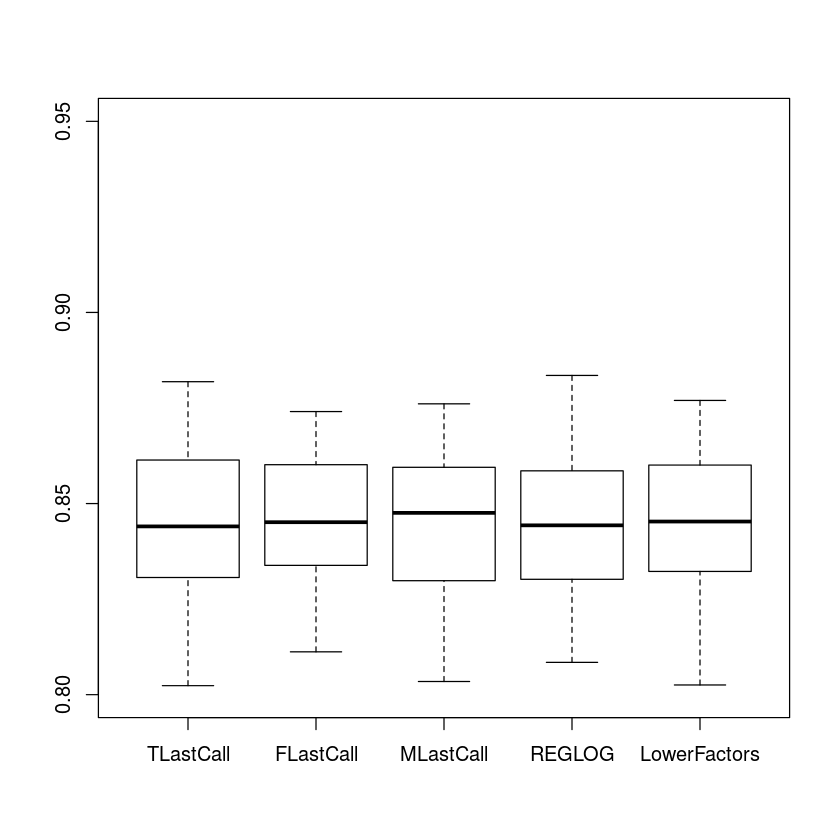

In [299]:
boxplot(bxdataframe,ylim=c(0.8,0.95))
abline(0.5,0,col="red")

In [300]:
bxdataframe2 = data.frame(TLastCall=xg4scores$LIFT10,FLastCall=xg4nlscores$LIFT10,MLastCall=xg4mscores$LIFT10,REGLOG=xg4rscores$LIFT10, LowerFactors=xg4lscores$LIFT10)

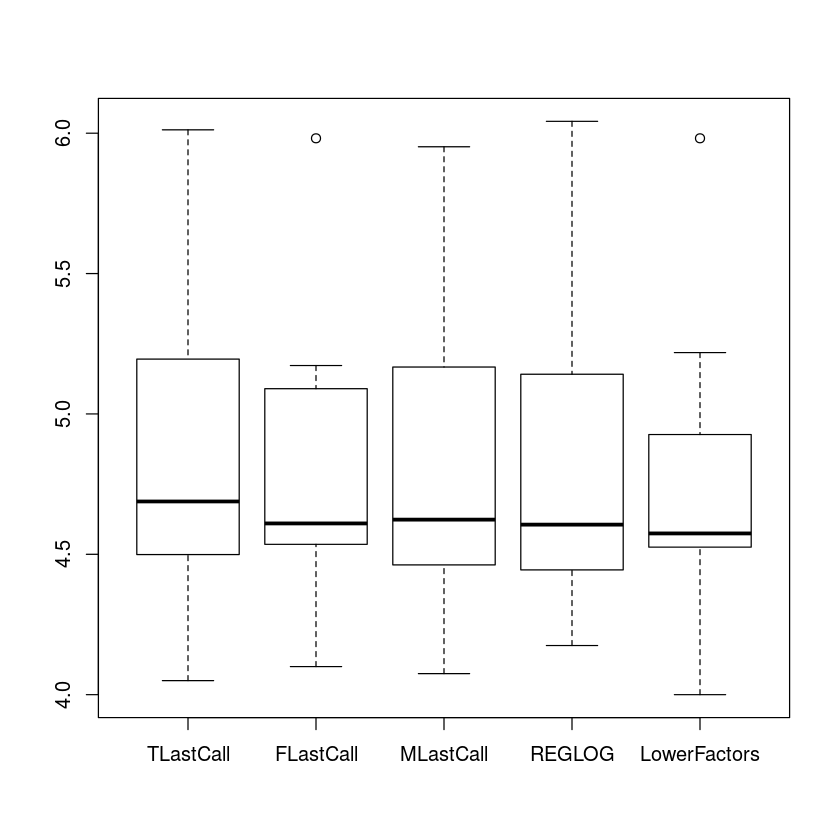

In [301]:
boxplot(bxdataframe2)

# Wyznaczenie scoringów

In [103]:
#polecam zamienic plik Student testowy na csv-kę

In [107]:
test = read.csv("Student-testowy.csv",header=TRUE)

### Wybieranie predyktorów zgodnie z train4

In [109]:
dim(train4)

[1] 93646    62

In [108]:
dim(test)

[1] 32967   116

In [110]:
indices_to_keep = unlist(sapply(colnames(train4),function(tt){which(colnames(test)==tt)}))

In [111]:
test2 = test[,indices_to_keep]

In [112]:
dim(test2)

[1] 32967    61

In [112]:
#zatem mamy wszystkie predyktory oprócz etykiety (której oczywiście nie ma)

### Konwersje kolumn, dodanie NA

In [113]:
a = data.frame(c(sapply(test2,class),'None'),sapply(train4,class))

In [116]:
#a[41:60,]

In [117]:
test2$etx_fuel_code = as.factor(test2$etx_fuel_code)

test2$production_year = as.numeric(test2$production_year)

test2$protection_scope = as.factor(test2$protection_scope)

test2$child_carriage_frequency = as.factor(test2$child_carriage_frequency)

test2$mileage = as.numeric(test2$mileage)
test2$yearly_mileage = as.numeric(test2$yearly_mileage)
test2$used_abroad = as.numeric(test2$used_abroad)


test2$theft_protection_installation = as.factor(test2$theft_protection_installation)
test2$theft_protection_device_1 = as.factor(test2$theft_protection_device_1)
test2$theft_protection_device_2 = as.factor(test2$theft_protection_device_2)

test2$buy_year = as.numeric(test2$buy_year)
test2$car_worth = as.numeric(test2$car_worth)
test2$main_driver_age = as.numeric(test2$main_driver_age)
test2$step = as.numeric(test2$step)
test2$oc_offer_min_val = as.numeric(test2$oc_offer_min_val)
test2$ac_offers_qty = as.numeric(test2$ac_offers_qty)
test2$b2c_leads_sent = as.numeric(test2$b2c_leads_sent)
test2$offer_first_after = as.numeric(test2$offer_first_after)
test2$offer_last_after = as.numeric(test2$offer_last_after)
test2$phone_lookup_status = as.numeric(test2$phone_lookup_status)
test2$went_to_partners = as.numeric(test2$went_to_partners)
test2$Account__r.AgreementMarketing__pc = as.integer(test2$Account__r.AgreementMarketing__pc)
test2$CarEngineCapacity__c = as.numeric(test2$CarEngineCapacity__c)
test2$CarYear__c = as.numeric(test2$CarYear__c)
test2$WentToPartner__c = as.integer(test2$WentToPartner__c)
test2$dont_have_this_car__c = as.integer(test2$dont_have_this_car__c)


#kody pocztowe
test2$night_parking_place_postal_code = postalCodeToRegion (test2$night_parking_place_postal_code)
test2$day_parking_place_postal_code = postalCodeToRegion (test2$day_parking_place_postal_code)
test2$main_driver_postal_code = postalCodeToRegion (test2$main_driver_postal_code)
test2$Account__r.BillingPostalCode = postalCodeToRegion (test2$Account__r.BillingPostalCode)

Dodanie NA do factorów

In [118]:
for (cc in 1:ncol(test2)){
    if (is.factor(test2[,cc]) & any(is.na(test2[,cc]))){
        test2[,cc] = addNA(test2[,cc])
    }
}

Zamiana dat na typ zgodny z obecnym w zbiorze treningowym

In [119]:
d0 <- as.Date(0, origin="1899-12-30", tz='UTC')

In [120]:
head(test2$registration_date)
head(test2$offer_last_at)
head(test2$Account__r.PersonBirthdate)
head(test2$PolicyStartDate__c)

[1] 15-Jul-05 0:00:00 15-May-15 0:00:00 15-Nov-98 0:00:00 15-Jul-17 0:00:00
[5] 15-Apr-97 0:00:00 15-May-13 0:00:00
355 Levels: 15-Apr-00 0:00:00 15-Apr-01 0:00:00 ... 4-Mar-09 0:00:00

[1] 1-Aug-17 0:31:01 1-Aug-17 0:31:36 1-Aug-17 0:41:27 1-Aug-17 0:50:04
[5] 1-Aug-17 1:19:49 1-Aug-17 1:23:55
20966 Levels:  10-Aug-17 0:03:20 10-Aug-17 0:04:51 ... 9-Aug-17 9:58:43

[1] 11-Jan-1948 9-Dec-1966  24-Jul-1975 12-Jan-1991 26-Apr-1999 10-May-1985
14075 Levels:  10-Apr-1938 10-Apr-1948 10-Apr-1952 10-Apr-1953 ... 9-Sep-1998

[1] 9-Aug-2017  7-Aug-2017  29-Oct-2017 1-Sep-2017  18-Aug-2017 4-Aug-2017 
218 Levels:  10-Aug-2017 10-Dec-2017 10-Feb-2018 10-Jan-2018 ... 9-Sep-2017

In [121]:
test2$registration_date = sapply(as.character(test2$registration_date), function(rd){
    a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    as.numeric(aa-d0)
})

In [122]:
test2$offer_last_at = sapply(as.character(test2$offer_last_at), function(rd){
    if (nchar(rd)<5) {NA} else {
        a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
        aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
        as.numeric(aa-d0)
    }
})

In [123]:
test2$Account__r.PersonBirthdate = sapply(as.character(test2$Account__r.PersonBirthdate), function(rd){
    if (nchar(rd)<5) {NA} else {
        a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
        aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%Y')
        as.numeric(aa-d0)
    }
})

In [124]:
test2$PolicyStartDate__c = sapply(as.character(test2$PolicyStartDate__c), function(rd){
    if (nchar(rd)<5) {NA} else {
        a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
        aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%Y')
        as.numeric(aa-d0)
    }
})

### Imputacja zbioru testowego

In [125]:
#wszystkie atrybuty numeryczne i integery (factory są już obsłużone przez NA)
test_numerics = which(sapply(test2,class)%in%c('numeric','preds'))
#wszystkie z NA
t = test_numerics[which(sapply(test2[,test_numerics],function(x)any(is.na(x))))]

In [126]:
colnames(test2)[t]

[1] "mileage"                    "car_worth"                 
[3] "ac_offers_qty"              "b2c_leads_sent"            
[5] "offer_last_at"              "Account__r.PersonBirthdate"
[7] "CarEngineCapacity__c"       "CarYear__c"                
[9] "PolicyStartDate__c"

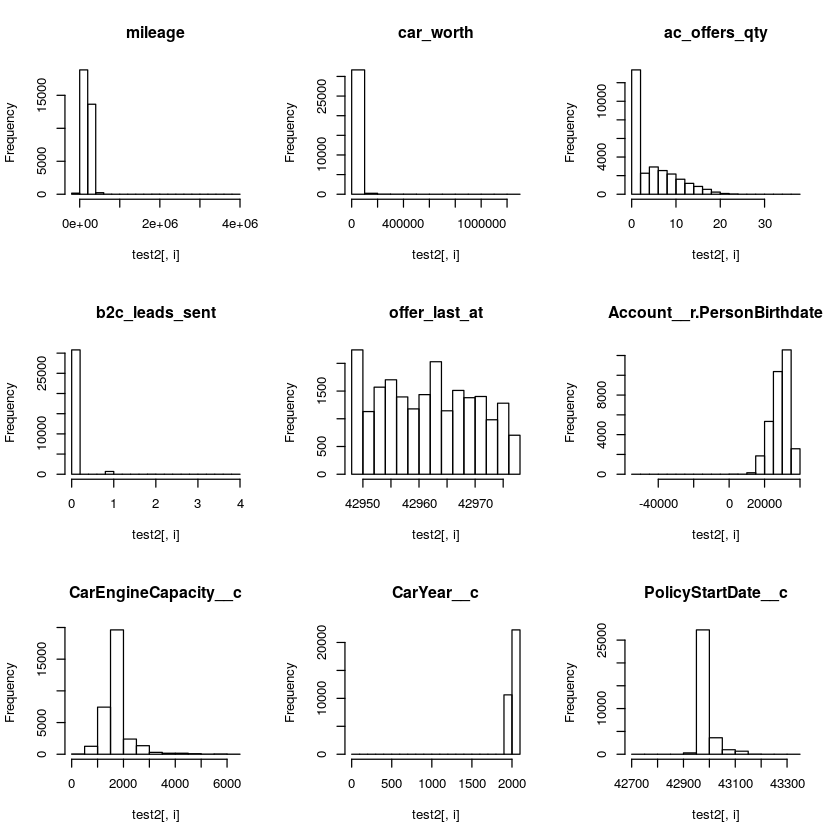

In [127]:
#troche mniej NA w numerycznych predyktorach. pokażę teraz histogramy dla zmiennych, tak dla jaj
par(mfrow=c(3,3))
for (i in t){
    hist(test2[,i],main=colnames(test2)[i])
}

In [128]:
# znowu używam średniej do imputacji wartości. niezbyt mądre, ale cholernie szybkie
for (i in t){
    missing = which(is.na(test2[,i]))
    test2[missing,i] = as.integer(mean(test2[-missing,i]))
}

In [129]:
any(sapply(test2,function(t2)any(is.na(t2))))

[1] FALSE

In [283]:
#wszystko zaimputowane. wszystkie kolumny przekonwertowane do dobrych typow, kody pocztowe zamienione,
#zatem w tym momencie mogę wyznaczać scoring (na ramce test2)

### Dostosowanie leveli factorów do danych testowych (bo danych testowych jest mniej)

### Wyznaczanie scoringu. Na dzień 10/11/2017, używam modelu xgBoost

In [130]:
#sprawdzanie równoważności kolejności zmiennych w zbiorze treningowym i testowym
#nie kontynuować, jeżeli tu będzie false!
all((head(colnames(train4),-1))==(colnames(test2))) #head -1 jest użyte by usunąć etykietę

[1] TRUE

In [131]:
#macierze rzadkie
mdtrain = sparse.model.matrix(Sale.success ~ ., train4)
mdtest = sparse.model.matrix(~ .,test2)
#dane testowe mają mniej leveli factorów
dim(mdtrain)
dim(mdtest)

[1]  93646 100696

[1] 32967 38074

In [134]:
#xgboost importance

trainxg = xgb.DMatrix(mdtrain,label=train4$Sale.success)

xg=  xgboost(trainxg, nrounds=10, objective = "binary:logistic")

xgi = xgb.importance(colnames(mdtrain),xg)
xgselected = xgi$Feature[which(xgi$Gain>=0.001)]
xgcols = sapply(xgselected,function(xgs){which(colnames(mdtrain)==xgs)})

[1]	train-error:0.047882 
[2]	train-error:0.048160 
[3]	train-error:0.048107 
[4]	train-error:0.048075 
[5]	train-error:0.048043 
[6]	train-error:0.048011 
[7]	train-error:0.048000 
[8]	train-error:0.048043 
[9]	train-error:0.047947 
[10]	train-error:0.047893 


In [135]:
xgcols

went_to_partners 
                                    1462 
                     phone_lookup_status 
                                     950 
                      utm_sourcecc-mfind 
                                    1391 
                        offer_last_after 
                                     949 
                      PolicyStartDate__c 
                                  100654 
                      TelehubStatus__cNA 
                                  100696 
                        oc_offer_min_val 
                                     944 
  TelehubStatus__csuccess_callmeback_kom 
                                  100691 
Acc_PhoneHLRStatus__ckomórkowy(poprawny) 
                                    1463 
                         main_driver_age 
                                     938 
                 Account__r.SalutationNA 
                                    8710 
                           offer_last_at 
                                     947 
                           ac_offers_qty 
                                     945 
              Account__r.PersonBirthdate 
                                    8694 
                               car_worth 
                                     907 
                                 mileage 
                                     813 
                                buy_year 
                                     905 
                 phone_existsphone_exist 
                                     941 
                       registration_date 
                                     906 
                              CarYear__c 
                                  100631 
                                Mpc__cNA 
                                  100653 
                       ProductScope__cOC 
                                  100655 
                       offer_first_after 
                                     948 
                    CarEngineCapacity__c 
                                  100547 
                       protection_scope2 
                                     804 
                        WentToPartner__c 
                                  100675 
 TelehubStatus__csuccess_callmeback_inne 
                                  100690 
                                    step 
                                     943 
                          yearly_mileage 
                                     814 
                          b2c_leads_sent 
                                     946 
       Account__r.AgreementMarketing__pc 
                                    1488 
               Account__r.SalutationPani 
                                    8709 
              utm_campaignmfind_internal 
                                    1022 
                  use_frequencyregularly 
                                     808 
       Account__r.AccountSourcefull_calc 
                                    1469 
                         production_year 
                                     803 
      Acc_PhoneHLRStatus__cniesprawdzony 
                                    1464 
               child_carriage_frequency2 
                                     810 
                          Mpc__ccc-mfind 
                                  100632 
              theft_protection_device_21 
                                     896 
    night_parking_placeindividual_garage 
                                     818 
     Account__r.BillingCityBielsko-Biała 
                                    1738 
        TelehubStatus__cin_progress_day1 
                                  100686 
                         utm_sourcewykop 
                                    1458

In [136]:
#sprawdzenie, czy te kolumny znajdują się w zbiorze testowym (z powodu innej liczby factorów, nie wiadomo):
in_test_features = sapply(names(xgcols),function(xc)any(colnames(mdtest)==xc))

In [137]:
selected_features = names(xgcols)[in_test_features]

In [138]:
#kolumny wybrane do predykcji
selected_features

[1] "went_to_partners"                        
 [2] "phone_lookup_status"                     
 [3] "utm_sourcecc-mfind"                      
 [4] "offer_last_after"                        
 [5] "PolicyStartDate__c"                      
 [6] "oc_offer_min_val"                        
 [7] "TelehubStatus__csuccess_callmeback_kom"  
 [8] "Acc_PhoneHLRStatus__ckomórkowy(poprawny)"
 [9] "main_driver_age"                         
[10] "offer_last_at"                           
[11] "ac_offers_qty"                           
[12] "Account__r.PersonBirthdate"              
[13] "car_worth"                               
[14] "mileage"                                 
[15] "buy_year"                                
[16] "phone_existsphone_exist"                 
[17] "registration_date"                       
[18] "CarYear__c"                              
[19] "ProductScope__cOC"                       
[20] "offer_first_after"                       
[21] "CarEngineCapacity__c"                    
[22] "protection_scope2"                       
[23] "WentToPartner__c"                        
[24] "TelehubStatus__csuccess_callmeback_inne" 
[25] "step"                                    
[26] "yearly_mileage"                          
[27] "b2c_leads_sent"                          
[28] "Account__r.AgreementMarketing__pc"       
[29] "Account__r.SalutationPani"               
[30] "utm_campaignmfind_internal"              
[31] "use_frequencyregularly"                  
[32] "Account__r.AccountSourcefull_calc"       
[33] "production_year"                         
[34] "Acc_PhoneHLRStatus__cniesprawdzony"      
[35] "child_carriage_frequency2"               
[36] "theft_protection_device_21"              
[37] "night_parking_placeindividual_garage"    
[38] "Account__r.BillingCityBielsko-Biała"     
[39] "TelehubStatus__cin_progress_day1"        
[40] "utm_sourcewykop"

In [139]:
xgtrain = mdtrain[,selected_features]

In [140]:
dim(xgtrain)

[1] 93646    40

In [142]:
#tuning dla wybranych predyktorów
sa = sample(1:nrow(xgtrain),20000,replace=F)
xgtrain2 = as.matrix(xgtrain[sa,])

In [143]:
xgFitControl = trainControl (method="cv",number = 4) #4fold
xgx = xgtrain2
xgy = as.factor(train4$Sale.success[sa])
xgModel = train(xgx,xgy,
    method = "xgbTree",
    trControl = xgFitControl)

In [144]:
#tuning
besttune = xgModel$bestTune
besttune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
31,50,2,0.3,0,0.8,1,0.75


In [152]:
#trenowanie właściwego modelu
trainxg = xgb.DMatrix(xgtrain,label=train4$Sale.success)

xg =  xgboost(params= xgModel$bestTune, data = trainxg, nrounds=50, objective = "binary:logistic")

[1]	train-error:0.048534 
[2]	train-error:0.048534 
[3]	train-error:0.048534 
[4]	train-error:0.048534 
[5]	train-error:0.048534 
[6]	train-error:0.048534 
[7]	train-error:0.048534 
[8]	train-error:0.048534 
[9]	train-error:0.048534 
[10]	train-error:0.048534 
[11]	train-error:0.048534 
[12]	train-error:0.048534 
[13]	train-error:0.048534 
[14]	train-error:0.048534 
[15]	train-error:0.048534 
[16]	train-error:0.048534 
[17]	train-error:0.048534 
[18]	train-error:0.048523 
[19]	train-error:0.048512 
[20]	train-error:0.048512 
[21]	train-error:0.048523 
[22]	train-error:0.048523 
[23]	train-error:0.048523 
[24]	train-error:0.048545 
[25]	train-error:0.048523 
[26]	train-error:0.048523 
[27]	train-error:0.048491 
[28]	train-error:0.048523 
[29]	train-error:0.048491 
[30]	train-error:0.048459 
[31]	train-error:0.048438 
[32]	train-error:0.048416 
[33]	train-error:0.048427 
[34]	train-error:0.048416 
[35]	train-error:0.048395 
[36]	train-error:0.048438 
[37]	train-error:0.048427 
[38]	train

In [153]:
#predykcja na zbiorze testowym
#w tym miejscu sprawdzam czy indeksy w rzadkich macierzach zbioru testowego i treningowego dokładnie się zgadzają
colnames(mdtrain[,selected_features])==colnames(mdtest[,selected_features])

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [368]:
#jeśli wszędzie wyżej jest true, można wybrać zbiór testowy i puścić predykcję

In [154]:
xgtest = mdtest[,selected_features]

In [155]:
dim(xgtest)

[1] 32967    40

In [156]:
pred_test = predict(xg,xgtest,type="response")

In [157]:
write.table(pred_test,"ABH-pred1.csv",col.names=F,row.names=F)